In [2]:
from utils import *

df = read_excel("fo.xlsx")
df

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질
5,콩,3,7,채소
6,베이컨,1,4,단백질
7,바나나,10,1,과일
8,배,10,7,과일
9,오이,2,8,채소


In [3]:
df[['당도', '아삭함']]


,당도,아삭함
0,7,3
1,8,5
2,3,6
3,2,3
4,3,1
5,3,7
6,1,4
7,10,1
8,10,7
9,2,8


In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질
5,콩,3,7,채소
6,베이컨,1,4,단백질
7,바나나,10,1,과일
8,배,10,7,과일
9,오이,2,8,채소


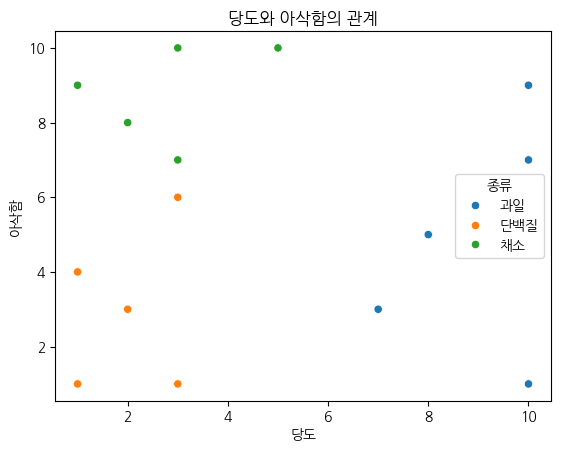

In [6]:
sns.scatterplot(x='당도', y='아삭함', hue='종류', data=df);
plt.title('당도와 아삭함의 관계');

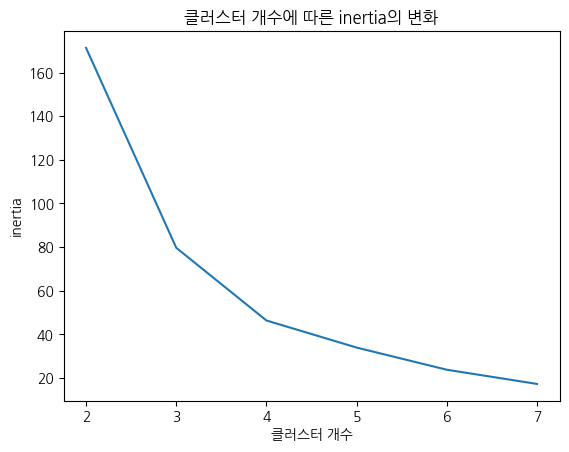

In [7]:
temp = []
for i in range(2, 8): # 2~7개의 클러스터를 만들어서 비교
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['당도', '아삭함']])
    temp.append(kmeans.inertia_) # inertia 는 각 점들이 중심점과의 거리의 합
plt.plot(range(2, 8), temp)
plt.xlabel('클러스터 개수')
plt.ylabel('inertia')
plt.title('클러스터 개수에 따른 inertia의 변화');

In [8]:
from sklearn.preprocessing import LabelEncoder

name = LabelEncoder()
kind = LabelEncoder()

df["name"] = name.fit_transform(df["이름"])
df["kind"] = kind.fit_transform(df["종류"])

df

,이름,당도,아삭함,종류,name,kind
0,오렌지,7,3,과일,10,0
1,포도,8,5,과일,14,0
2,견과류,3,6,단백질,0,1
3,새우,2,3,단백질,6,1
4,생선,3,1,단백질,8,1
5,콩,3,7,채소,13,2
6,베이컨,1,4,단백질,4,1
7,바나나,10,1,과일,2,0
8,배,10,7,과일,3,0
9,오이,2,8,채소,11,2


In [9]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df[['당도','아삭함']].values
y = df['kind'].values

X, y

(array([[ 7,  3],
        [ 8,  5],
        [ 3,  6],
        [ 2,  3],
        [ 3,  1],
        [ 3,  7],
        [ 1,  4],
        [10,  1],
        [10,  7],
        [ 2,  8],
        [ 1,  1],
        [ 5, 10],
        [10,  9],
        [ 3, 10],
        [ 1,  9]]),
 array([0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2]))

In [10]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k).fit(X, y)
print(clf)

yhat = clf.predict(X)
print(f"Test set Accuracy: {metrics.accuracy_score(y, yhat):.2f}\n")

print(f"classifier after fitting with data:")
attr(clf)[2]

KNeighborsClassifier(n_neighbors=3)
Test set Accuracy: 0.93

classifier after fitting with data:


{'algorithm': 'auto',
 'classes_': array([0, 1, 2]),
 'effective_metric_': 'euclidean',
 'effective_metric_params_': {},
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_features_in_': 2,
 'n_jobs': None,
 'n_neighbors': 3,
 'n_samples_fit_': 15,
 'outputs_2d_': False,
 'p': 2,
 'radius': None,
 'weights': 'uniform'}

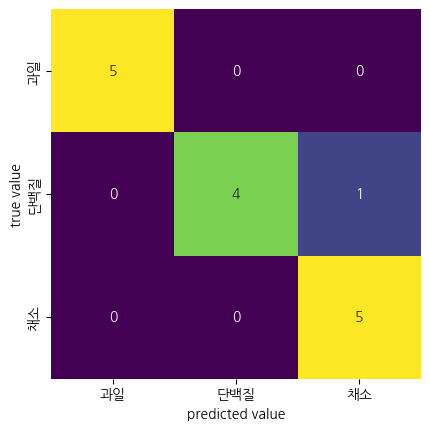

In [11]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y, y_pred=yhat)

xticklabels = yticklabels = kind.classes_
sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

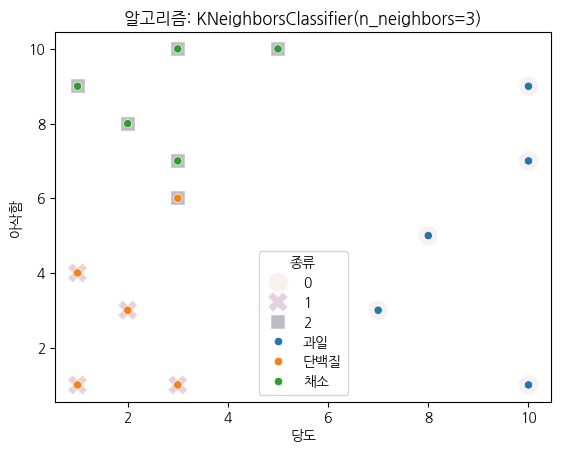

In [12]:
sns.scatterplot(x='당도', y='아삭함', hue=yhat, style=yhat, data=df, marker='s', s=200, alpha=0.3)
sns.scatterplot(x='당도', y='아삭함', hue='종류', data=df);
plt.title(f"알고리즘: {clf}");

### KMeans Clustering

In [15]:
k = 3
clf = KMeans(n_clusters=k).fit(X)

yhat = clf.predict(X)
attr(yhat)[2] # KMeans 클러스터링 결과

{'T': array([2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1], dtype=int32),
 'base': None,
 'ctypes': <numpy.core._internal._ctypes at 0x7faeeb563290>,
 'data': <memory at 0x7faeeb611300>,
 'dtype': dtype('int32'),
 'flags':   C_CONTIGUOUS : True
   F_CONTIGUOUS : True
   OWNDATA : True
   WRITEABLE : True
   ALIGNED : True
   WRITEBACKIFCOPY : False,
 'flat': <numpy.flatiter at 0x405b800>,
 'imag': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 'itemsize': 4,
 'nbytes': 60,
 'ndim': 1,
 'real': array([2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1], dtype=int32),
 'shape': (15,),
 'size': 15,
 'strides': (4,)}

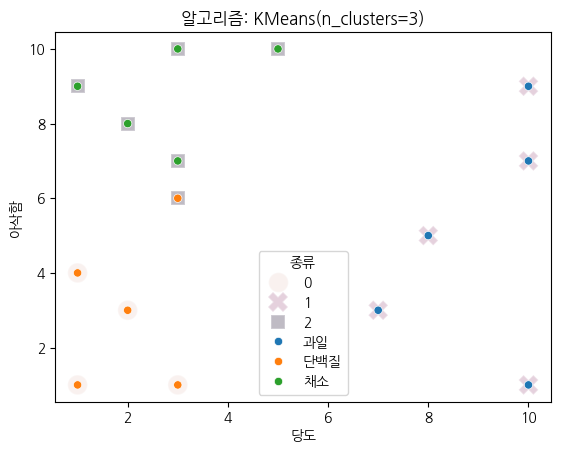

In [14]:
sns.scatterplot(x='당도', y='아삭함', hue=yhat, style=yhat, data=df, marker='s', s=200, alpha=0.3)
sns.scatterplot(x='당도', y='아삭함', hue='종류', data=df)
plt.title(f"알고리즘: {clf}");